# Add Introduction!!!

## Imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# FIXME: Remove the two first instructions
import sys
sys.path.append('./DataLoader')

from DataLoader.Dataset import Dataset


In [4]:
DATASET_PATH= './Data'
ds = Dataset(path=DATASET_PATH)

In [5]:
ds_size = len(ds)
print(f'The dataset size is {ds_size}')

The dataset size is 10


In [6]:
from collections import Counter

#FIXME: Change function name. Change dp and ds names
#TODO: Add percentages
def category_pie(ds, attribute_getter, figure_name):
    def category_list():
        categories = []
        for dp in ds:
            categories += [attribute_getter(dp)]

        return categories
    count_dict = Counter(category_list())
    plt.figure()
    plt.title(figure_name)
    plt.pie(count_dict.values(), labels=count_dict.keys())


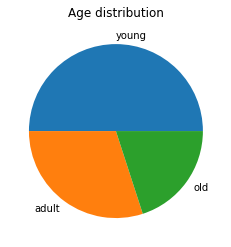

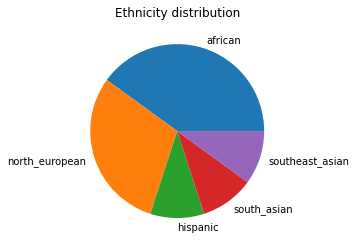

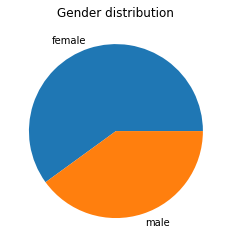

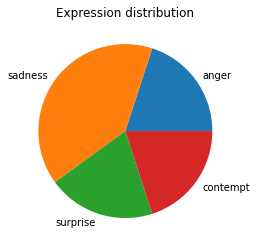

In [7]:
category_pie(ds, lambda dp : dp.identity_label.age, 'Age distribution')
category_pie(ds, lambda dp : dp.identity_label.ethnicity, 'Ethnicity distribution')
category_pie(ds, lambda dp : dp.identity_label.gender, 'Gender distribution')
category_pie(ds, lambda dp : dp.face_expression.name, 'Expression distribution')

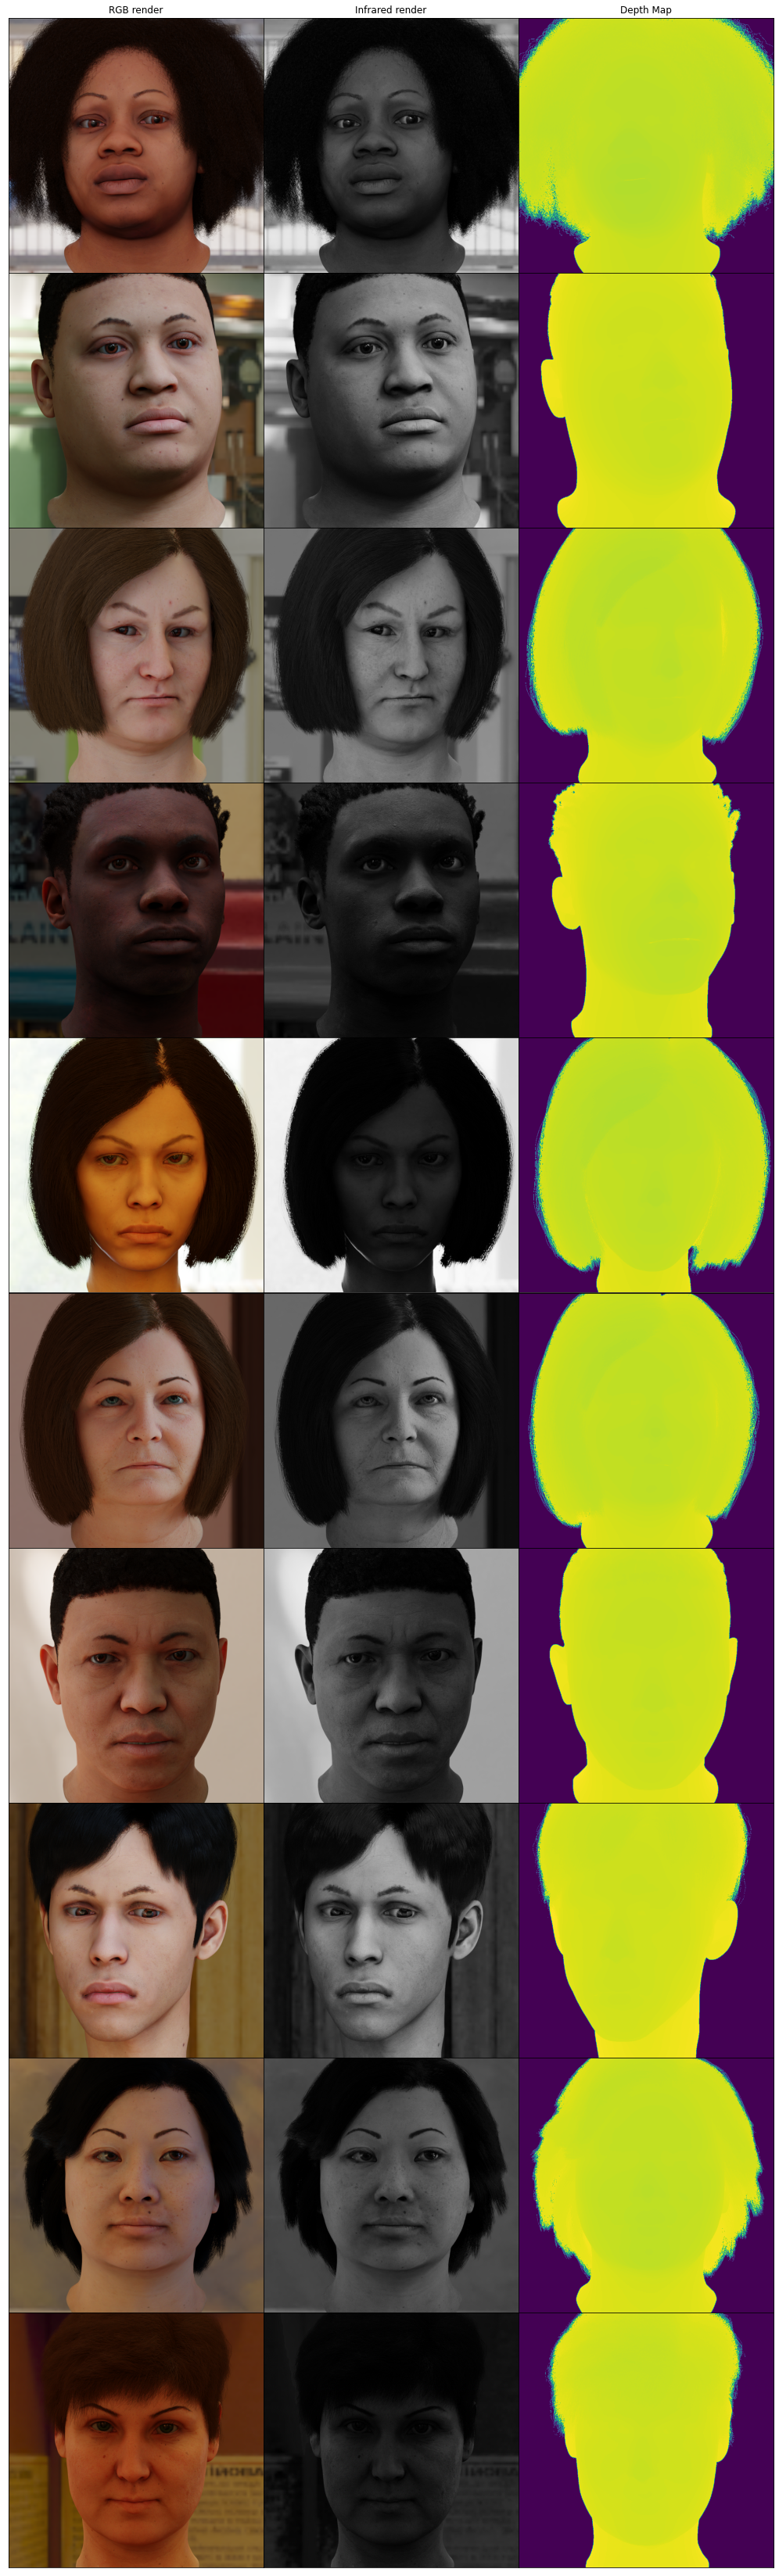

In [58]:
from mpl_toolkits.axes_grid1 import ImageGrid

# Normalizing and clamping infinite values from depth map for better visualization
def normalize_depth_map(depth_map):
    depth_map = ds[i].depth_img.copy()
    depth_map[depth_map > 2**15] = 0
    depth_map -= depth_map.min()
    depth_map /= depth_map.max()
    return depth_map

items_to_plot = min(len(ds), 10)
fig_shape = np.array((items_to_plot, 3))
figsize = 20 * fig_shape
fig = plt.figure(figsize=figsize)
grid = ImageGrid(fig, 111, nrows_ncols=fig_shape, axes_pad=0.)

imgs = []
for i in range(items_to_plot):
    imgs += [ds[i].rgb_img, ds[i].ir_img, normalize_depth_map(ds[i].depth_img)]

grid[0].set_title('RGB render')
grid[1].set_title('Infrared render')
grid[2].set_title('Depth Map')



for ax, im in zip(grid, imgs):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(im)
